In [74]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
import ast
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [21]:
df = pd.read_csv('datasets/analysis.csv')

In [22]:
# no nul' values 
df.isna().sum()

title               0
split_comments      0
reordered_scores    0
reordered_labels    0
sentiment           0
dtype: int64

In [39]:
df['reordered_scores'] = df['reordered_scores'].apply((lambda x: ast.literal_eval(x)))

In [50]:
fears = df.sort_values(by='reordered_scores', key=lambda x: x.apply(lambda y: y[0]), ascending=False)
frustrations = df.sort_values(by='reordered_scores', key=lambda x: x.apply(lambda y: y[1]), ascending=False)
aspirations = df.sort_values(by='reordered_scores', key=lambda x: x.apply(lambda y: y[2]), ascending=False)


In [64]:
fears

,title,split_comments,reordered_scores,reordered_labels,sentiment
6233,How to Beat Procrastination,"""fear is the greatest illusion we create within our self.""","[0.9896448254585266, 0.006187118589878082, 0.0041680666618049145]","['fears', 'frustrations', 'aspirations']",negative
5909,How to Beat Procrastination,i feel like i need to listen to this weekly to face my fears.,"[0.9816955924034119, 0.01092555746436119, 0.007378820795565844]","['fears', 'frustrations', 'aspirations']",neutral
1383,5 Essential Tips for Long-Lasting Productivity,али обдал чай кипятком :face_screaming_in_fear:,"[0.9796825647354126, 0.01780746690928936, 0.0025099022313952446]","['fears', 'frustrations', 'aspirations']",negative
6558,How to Beat Procrastination,that fear compass concept is genius!,"[0.9769877791404724, 0.0062966798432171345, 0.016715513542294502]","['fears', 'frustrations', 'aspirations']",positive
7087,My Toxic Relationship With Productivity,status anxiety - alain de botton,"[0.9682902693748474, 0.021380305290222168, 0.010329443961381912]","['fears', 'frustrations', 'aspirations']",neutral
...,...,...,...,...,...
5623,How I Manage My Time - 10 Time Management Tips,"i love this guy, the reason i started my dreams now.","[0.0028450298123061657, 0.002766459947451949, 0.9943884611129761]","['fears', 'frustrations', 'aspirations']",positive
14841,5 Small Changes to Supercharge Your Focus,thomas frank is an inspiration,"[0.0027784034609794617, 0.002567431889474392, 0.9946541786193848]","['fears', 'frustrations', 'aspirations']",positive
1259,5 Essential Tips for Long-Lasting Productivity,it's inspiring!,"[0.002528827404603362, 0.0036696013994514942, 0.9938015937805176]","['fears', 'frustrations', 'aspirations']",positive
11272,7 Actionable Ways to Achieve More in Life,you're my inspiration,"[0.002028948161751032, 0.001852899556979537, 0.9961181282997131]","['fears', 'frustrations', 'aspirations']",positive


# Clustering 
1. I'll have to tokenize the data 
2. Remove Stopwords 
3. Stemming/Lemmatization [reduce words to their basic form] (running -> run)
4. vectorization 
5. Possibly Feature Reduction 

In [75]:
# Preprocess the text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    return text

In [76]:
df['processed_comments'] = df['split_comments'].apply(preprocess_text)

In [77]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [78]:
df['processed_comments'] = df['processed_comments'].apply(lemmatize_text)

In [79]:

# Vectorize the text
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=1000)
X = tfidf_vectorizer.fit_transform(df['processed_comments'])

In [80]:

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

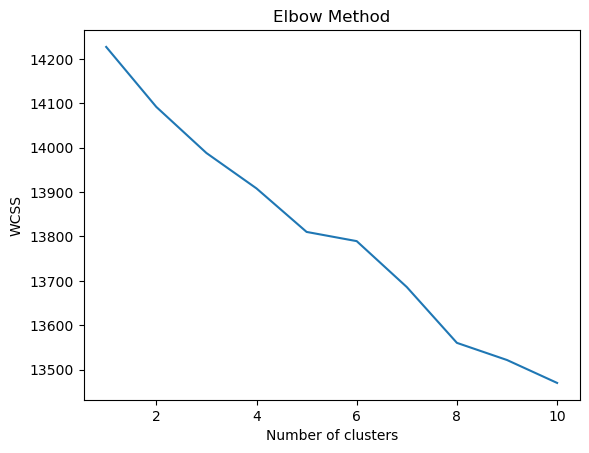

In [81]:

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
optimal_clusters = 4

In [83]:

# Cluster the data with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

/opt/anaconda3/envs/ai/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [84]:
df['cluster'] = clusters

In [86]:

# Explore the clusters
for i in range(optimal_clusters):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['split_comments'].head(10))  # Display the first 10 comments in each cluster
    print('\n')

Cluster 0:
18                                                                                                                             i love your energy! no wonder why you stay at the top for so long time. you inspire me a lot for my own channel. thank you ali!!
38     you are doing an incredible job sir, really really love the content you put out time and again:) you are very amazing...thank you so so much for doing what you do!!! lots and lots of love and support from my side:blue_heart::smiling_face_with_halo:
137                                                                                                                                                     great tips - thank you! do you have any advice to tackle an already full email inbox to get it to zero?
146                                                                                                                                                                                                            much needed vi

In [88]:
df[df['cluster']== 1]

,title,split_comments,reordered_scores,reordered_labels,sentiment,lemm_comments,cluster,processed_comments
0,How to Build Your Ultimate Productivity System,how to remember the system then?,"[0.20157860219478607, 0.34655919671058655, 0.45186224579811096]","['fears', 'frustrations', 'aspirations']",neutral,how to remember the system then ?,1,how to remember the system then
1,How to Build Your Ultimate Productivity System,"15/3/24, x2.","[0.3612099289894104, 0.26915282011032104, 0.36963728070259094]","['fears', 'frustrations', 'aspirations']",neutral,"15/3/24 , x2 .",1,15 3 24 x2
3,How to Build Your Ultimate Productivity System,you should try breathing and just being in the moment while you are in the toilet. :grinning_squinting_face:,"[0.19090235233306885, 0.4940927028656006, 0.31500494480133057]","['fears', 'frustrations', 'aspirations']",neutral,you should try breathing and just being in the moment while you are in the toilet . : grinning_squinting_face :,1,you should try breathing and just being in the moment while you are in the toilet grinning_squinting_face
4,How to Build Your Ultimate Productivity System,took me out when he said “my brain is a dumass” :face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy:,"[0.0920601338148117, 0.8241838812828064, 0.08375602215528488]","['fears', 'frustrations', 'aspirations']",negative,took me out when he said “ my brain is a dumas ” : face_with_tears_of_joy : :face_with_tears_of_joy : :face_with_tears_of_joy :,1,took me out when he said my brain is dumas face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy
5,How to Build Your Ultimate Productivity System,"nice video, most people remain poor, cos friends and relatives discouraged and advised them against investing and trading forex, while the wise ones kept investing and growing higher financially.","[0.19447176158428192, 0.6681983470916748, 0.13732989132404327]","['fears', 'frustrations', 'aspirations']",neutral,"nice video , most people remain poor , co friend and relative discouraged and advised them against investing and trading forex , while the wise one kept investing and growing higher financially .",1,nice video most people remain poor co friend and relative discouraged and advised them against investing and trading forex while the wise one kept investing and growing higher financially
...,...,...,...,...,...,...,...,...
14920,5 Small Changes to Supercharge Your Focus,1st to comment here,"[0.32147181034088135, 0.24626325070858002, 0.43226495385169983]","['fears', 'frustrations', 'aspirations']",neutral,1st to comment here,1,1st to comment here
14922,5 Small Changes to Supercharge Your Focus,im 3rd,"[0.17630787193775177, 0.18799357116222382, 0.6356985569000244]","['fears', 'frustrations', 'aspirations']",neutral,im 3rd,1,im 3rd
14923,5 Small Changes to Supercharge Your Focus,what if he pinned my cmt?:grinning_face_with_sweat:,"[0.5885409116744995, 0.3420863449573517, 0.06937270611524582]","['fears', 'frustrations', 'aspirations']",neutral,what if he pinned my cmt ? : grinning_face_with_sweat :,1,what if he pinned my cmt grinning_face_with_sweat
14924,5 Small Changes to Supercharge Your Focus,first to comment,"[0.28964871168136597, 0.2726641297340393, 0.4376871585845947]","['fears', 'frustrations', 'aspirations']",neutral,first to comment,1,first to comment
